### Инструкция по выполнению проекта:

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Описание проекта.

Перед маркетинговым аналитиком развлекательного приложения Procrastinate Pro+ поставлена задача
разобраться в причинах сдедующей ситуации:

Несколько прошлых месяцев  бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. 

У нас в распоряжении есть 
лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, 
выгрузка их покупок за этот период, а также статистика рекламных расходов. 

Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta as td
from matplotlib import pyplot as plt

import time

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [3]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [4]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# проверим на дубликаты
visits[visits.duplicated()]

,User Id,Region,Device,Channel,Session Start,Session End


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
# проверим на дубликаты
orders[orders.duplicated()]

,User Id,Event Dt,Revenue


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [10]:
# проверим на дубликаты
costs[costs.duplicated()]

,dt,Channel,costs


В результате обзора данных видим, что столбцы датасета visits с данными о начале и конце сессии необходимо привести к типу date, такая же история со столбцами Event Dt и dt в orders и costs, соответственно. Также нужно переименовать столбцы в названия со строчными буквами и записать snake.

Пропусков данных и дубликатов нет.
Приведем данные в порядок:

In [11]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id':'user_id','session start':'session_start','session end':'session_end' })
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [12]:
visits['region'] = visits['region'].astype(str)
visits['device'] = visits['device'].astype(str)
visits['channel'] = visits['channel'].astype(str)

In [13]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

In [14]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [15]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [16]:
visits.describe()

,user_id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


In [17]:
pd.DataFrame(round((visits.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0.000000
region,0.000000
device,0.000000
channel,0.000000
session_start,0.000000
session_end,0.000000


Нулевых значений нет.

In [18]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id':'user_id','event dt':'event_dt'})
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [19]:
orders.describe()

,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [20]:
pd.DataFrame(round((orders.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0.000000
event_dt,0.000000
revenue,0.000000


Нулевых значений нет.

In [21]:
costs.columns = costs.columns.str.lower()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [22]:
costs['channel'] = costs['channel'].astype(str)

In [23]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [24]:
pd.DataFrame(round((costs.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
dt,0.000000
channel,0.000000
costs,0.000000


Нулевых значений нет.

In [25]:
costs['channel'].value_counts()

AdNonSense            180
FaceBoom              180
LeapBob               180
MediaTornado          180
TipTop                180
WahooNetBanner        180
RocketSuperAds        180
OppleCreativeMedia    180
YRabbit               180
lambdaMediaAds        180
Name: channel, dtype: int64

In [26]:
# преобразуем данные сессий для дальнейших расчетов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### Вывод

Таким образом, мы провели предобработку данных и подготовили  данные к дальнейшему исследованию.
Уникальных пользователей у нас 150 008. Пользователь с максимальной активностью 46 раз фигурирует в нащей выборке.  В логах имеются данные о пользователях из 4х стран - США, Англии, Франции, Германии. Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone (112603). 
Данные представлены  в виде 180 519 уникальных записей с информацией о начале сессии. 
Всего записей - 309901 И 180778 уникальных записей с информацией о конце сессии. 

В логах о заказах у нас присутствует 8881 уникальный пользователь, самый часто заказывающий - пользователь 901180916748. Всего в выгрузке 40212 строк с информацией о заказах. Из них 40163 с уникальным 'event_dt'. 
В среднем каждый заказ совершается на сумму 5.37 $. 
Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. 

Всего 1800 строк с данными о затратах на маркетинг. Из них 180 уникальных строк с датами, то есть, в логах собраны данные за 180 дней. В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'. 

Средние и медианные затраты на маркетинг 58.6 и 12.2 соответственно - возможно, что на какие-то каналы уходит больше трат, на какие-то меньше. 
Максимальная трата на маркетинг - 630$, минимальные - 0.8.


# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми мы познакомились в теоретических уроках.

In [27]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [30]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [32]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Также зададим функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [33]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Создадим пользовательские профили, oпределим минимальную и максимальную даты привлечения пользователей.

In [35]:
# вызовем функцию для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [36]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей.

In [37]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа

In [38]:
print(min_analysis_date, "\n", observation_date)

2019-05-01 00:00:00 
 2019-10-27 00:00:00


Минимальная дата привлечения пользователей - 1 мая 2019 года.
Максимальная дата привлечения пользователей - 27 октября 2019 года. 

Интервал соответствует вводным данным.

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

Построим таблицу, отражающую количество пользователей и их долю из каждой страны.

In [39]:
regions = pd.DataFrame()
regions['users_reg'] = profiles.groupby('region')['user_id'].count()
regions['share'] = ((regions['users_reg'] / profiles['region'].count()) * 100)
regions.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_reg,share
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Видим, что  бОльшая доля пользователей  из США (66.66%). 

Доли пользователей из Англии и Франции (~ 12%). 

Меньше всего пользователей из Германии (~ 10%).

Теперь посмотрим на платящих пользователей и долю платящих из каждой страны.

In [40]:
region_payer = pd.DataFrame()
region_payer['users_reg'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer['share'] = ((region_payer['users_reg'] / profiles.query('payer == True')['region'].count()) * 100)
region_payer.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_reg,share
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


Здесь картина аналогичная:

Платящие пользователи из США лидируют (78%), 

доли платящих из Франции и Англии примерно равны (7-8%), 

меньше всего платящих пользователей из Германии (~ 7%)

Рассчитаем долю платящих пользователей отдельно по странам.

In [41]:
# вызовем функцию
def pivot_share_result(column, df):
    result = pd.DataFrame()
    result['users_reg'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users_reg'] / df[column].count()) * 100)
    result['payer_users_reg'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users_reg'] / result['users_reg']) * 100)
    return result.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%', 'payer_share': '{:.2f}%'})

In [42]:
pivot_share_result('region', profiles)

,users_reg,users_share,payer_users_reg,payer_share
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Видим, что доля платящих пользователей из США - 6.90%. 

Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). 

Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). 

Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.1%).

### Узнаем, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи.

In [43]:
devices = pd.DataFrame()
devices['users_reg'] = profiles.groupby('device')['user_id'].count()
devices['share'] = ((devices['users_reg'] / profiles['device'].count()) * 100)
devices.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})



,users_reg,share
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Большинство пользователей - это владельцы IPhone (36%) и Android (23%). 

То есть, клиенты больше пользуются мобильными устройствами, чем ПК. 

Доли PC и Mac практически одинаковы (по 20%).

Исследуем распределение для платящих пользователей.

In [44]:
device_payer = pd.DataFrame()
device_payer['users_reg'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer['share'] = ((device_payer['users_reg'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_reg,share
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Картина для платящих пользователей повторяет общую картину, но  MAC обошел  PC. 

Основная доля платящих пользователей - это владельцы IPhone (38%). 

Далее идут владельцы Android (23%), Mac(21%) и PC(17%).

Рассчитаем долю платящих пользователей отдельно по устройствам.

In [45]:
pivot_share_result('device', profiles)

,users_reg,users_share,payer_users_reg,payer_share
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Среди пользователей iPhone (54 479 человек) доля платящих равна 6.21%.

Для пользователей Android (35032 человек) она составляет 5.85%.

Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт. 

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [46]:
channels = pd.DataFrame()
channels['users_reg'] = profiles.groupby('channel')['user_id'].count()
channels['share'] = ((channels['users_reg'] / profiles['channel'].count()) * 100)

channels['payer_users_reg'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channels['payer_share'] = ((channels['payer_users_reg'] / profiles.query('payer == True')['channel'].count()) * 100)

channels.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users_reg,share,payer_users_reg,payer_share
channel,,,,
organic,56439,37.62%,1160,13.06%
FaceBoom,29144,19.43%,3557,40.05%
TipTop,19561,13.04%,1878,21.15%
OppleCreativeMedia,8605,5.74%,233,2.62%
LeapBob,8553,5.70%,262,2.95%
WahooNetBanner,8553,5.70%,453,5.10%
RocketSuperAds,4448,2.97%,352,3.96%
MediaTornado,4364,2.91%,156,1.76%
YRabbit,4312,2.87%,165,1.86%


Если посмотреть на разбивку по источникам привлечения для всех пользователей (и платящих, и неплатящих), то можно заметить, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom (40%), 21% из TipTop и только 13% - из органического трафика.

По остальным каналам распределение равномерное (в районе 3-5%). Самый непопулярный канал для всех сегментов пользователей - это lambdaMediaAds, для платящих - MediaTornado.

Рассчитаем долю платящих пользователей отдельно по  каналам.

In [47]:
pivot_share_result('channel', profiles)

,users_reg,users_share,payer_users_reg,payer_share
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%). 

Менее всего конвертируются пользователи из каналов organic (2.06%), OppleCreativeMedia (2.71%) и LeapBob (3.06%).

### Вывод

В результате нами  сформированы профили пользователей. 

Для этого использовалась функция get_profiles(), в которую были переданы данные о посещениях, покупках и тратах на рекламу. Определены минимальная и максимальная даты привлечения пользователей. 

Таким образом, можем определенно ответить на вопросы:

##### Из каких стран приходят посетители? 
БОльшая доля пользователей из США (66.66%).

Доли пользователей из Англии и Франции (~ 12%).

Меньше всего пользователей из Германии (~ 10%).

##### Какие страны дают больше всего платящих пользователей?

доля платящих пользователей из США  в численном и процентном отношении больше, чем из других стран выборки.

##### Какими устройствами они пользуются? 

Большинство пользователей - это владельцы IPhone (36%) и Android (23%).

То есть, клиенты больше пользуются мобильными устройствами, чем ПК.

Доли PC и Mac практически одинаковы (по 20%).

###### С каких устройств чаще всего заходят платящие пользователи?

Основная доля платящих пользователей - это владельцы IPhone (38%).

Далее идут владельцы Android (23%), Mac(21%) и PC(17%).

##### По каким рекламным каналам шло привлечение пользователей? 

Если не брать во внимание органический трафик, на который приходится максимум (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

##### Какие каналы приносят больше всего платящих пользователей?.

Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%).


# Шаг 4. Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Выясним, сколько людей пользуются приложением в день, неделю и месяц: рассчитаем DAU, WAU и MAU

Для оценки размера аудитории воспользуемся метриками DAU, MAU, WAU. Они помогут выявить сопутствующие прогнозы и выводы, а также оценить лояльность и вовлеченность аудитории (Sticky Factor). Мы делим DAU на WAU или на MAU. И эта метрика показывает ядро аудитории, какая доля наших пользователей в течение дня/недели заходит еще и в течение месяца, то есть, периодично. И чем этот фактор ближе к 1, тем лучше.

В датафрейме visits cоздадим отдельную колонку 'visit_day', которая показывает нам день визита.

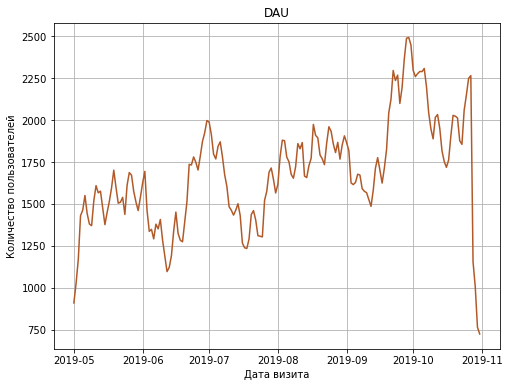

In [48]:
plt.figure(figsize=(8,6))
#посмотрим на dau
visits['visit_day'] = visits['session_start'].dt.date
visits.groupby('visit_day')['user_id'].nunique().plot(colormap='Paired_r', grid=True)
plt.title('DAU')
plt.xlabel('Дата визита')
plt.ylabel('Количество пользователей')
plt.show()

In [49]:
visits.groupby('visit_day')['user_id'].nunique().describe()

count     184.000000
mean     1684.239130
std       324.247388
min       724.000000
25%      1462.000000
50%      1682.000000
75%      1870.750000
max      2493.000000
Name: user_id, dtype: float64

Среднее значение DAU и медиана практически равны - 1684.2 

Наблюдаем рост количества пользователей в день, значит, продукт растет и развивается.

Cоздадим отдельную колонку 'visit_week', которая показывает нам неделю визита. 


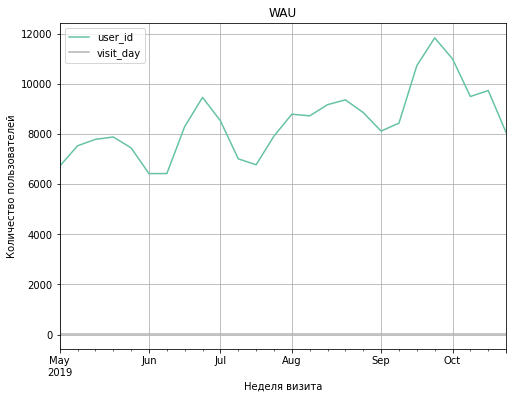

In [50]:
visits['visit_week'] = visits['session_start'].astype('datetime64[W]')
(visits
 .groupby(['visit_week'])
 .agg({'user_id': 'nunique', 'visit_day' : 'nunique'})
 .query('visit_day == 7')
).plot(colormap='Set2', grid=True, figsize=(8,6))
plt.title('WAU')
plt.xlabel('Неделя визита')
plt.ylabel('Количество пользователей')
plt.show()

In [51]:
visits.groupby('visit_week')['user_id'].nunique().describe()

count       28.000000
mean      7942.214286
std       2414.358213
min        724.000000
25%       7345.750000
50%       8216.000000
75%       9229.750000
max      11849.000000
Name: user_id, dtype: float64

Среднее значение WAU - 7942.2 пользователя, медиана расположена довольно близко к среднему - 8216. 
Имеем плавный рост недельной аудитории, в последнюю неделю сентября ее число приблизилось к 12000, после чего в октябре стало падать до 10000 пользователей.

Те же действия производим с  MAU:

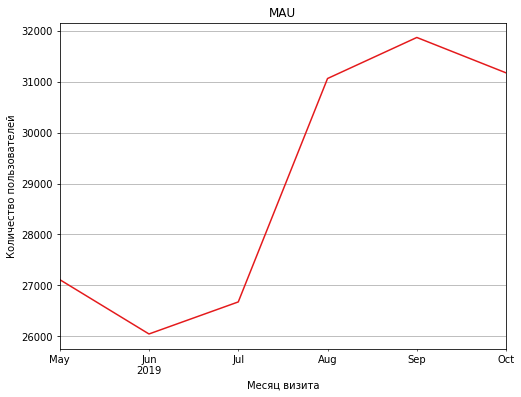

In [52]:
plt.figure(figsize=(8,6))

visits['visit_month'] = visits['session_start'].astype('datetime64[M]')
visits.groupby('visit_month')['user_id'].nunique().plot(colormap='Set1', grid=True)
plt.title('MAU')
plt.xlabel('Месяц визита')
plt.ylabel('Количество пользователей')
plt.show()

In [53]:
visits.groupby('visit_month')['user_id'].nunique().describe()

count        6.000000
mean     28989.166667
std       2644.629533
min      26042.000000
25%      26781.750000
50%      29087.500000
75%      31147.250000
max      31871.000000
Name: user_id, dtype: float64

Среднее значение MAU - 28989 пользователей, медиана - 29087 пользователей. 
Наблюдается рост аудитории, начиная с июня 2019  до сентября, что говорит об эффективности действий менеджеров.

В октябре MAU стал снижаться до 31000.

С помощью Sticky Factor оценим лояльность и вовлеченность аудитории.

Sticky factor отражает регулярность использования сервиса, и для недельной аудитории рассчитывается как DAU/WAU, для месячной аудитории — DAU/MAU.

In [54]:
users_data = visits.copy()
users_data['session_year'] = users_data['session_start'].dt.year
users_data['session_month'] = users_data['session_start'].dt.month
users_data['session_week'] = users_data['session_start'].dt.isocalendar().week

users_data['session_date'] = users_data['session_start'].dt.date

#для месячной аудитории
mau_total = (
    users_data.groupby(['session_year', 'session_month'])
    .agg({'user_id': 'nunique'})
    .mean()
)
#для дневной аудитории
dau_total = (
    users_data.groupby('session_date').agg({'user_id': 'nunique'}).mean()
)
#для недельной аудитории
wau_total = (
    users_data.groupby(['session_year', 'session_week'])
    .agg({'user_id': 'nunique'})
    .mean()
)

In [55]:
sticky_wau = dau_total/wau_total*100 
print('Sticky Factor для недельной аудитории %s' % sticky_wau[0].round(2))
sticky_mau = dau_total/mau_total*100
print('Sticky Factor для месячной аудитории %s' %sticky_mau[0].round(2))

Sticky Factor для недельной аудитории 20.16
Sticky Factor для месячной аудитории 5.81


Такой Sticky Factor может быть весомым аргументом для инвесторов.

#### Рассчитаем среднее число покупок на одного покупателя за день, неделю и месяц.

Посчитаем среднее число покупок на пользователя (для удобства назовем его покупателем):

In [56]:
report = orders.copy()
report['dt'] = report['event_dt'].dt.date
report = report.groupby('dt').agg({'user_id': 'nunique', 'event_dt': 'count'})
report.columns = ['buyers', 'orders']
report['orders_per_buyer'] = report['orders'] / report['buyers']
report

,buyers,orders,orders_per_buyer
dt,,,
2019-05-01,25,25,1.0
2019-05-02,29,29,1.0
2019-05-03,44,44,1.0
2019-05-04,56,56,1.0
2019-05-05,58,58,1.0
...,...,...,...
2019-10-27,340,340,1.0
2019-10-28,287,287,1.0
2019-10-29,315,315,1.0


In [57]:
report.describe()

,buyers,orders,orders_per_buyer
count,184.000000,184.000000,184.000000
mean,218.532609,218.543478,1.000035
std,77.643145,77.657003,0.000331
min,25.000000,25.000000,1.000000
25%,157.750000,157.750000,1.000000
50%,227.500000,227.500000,1.000000
75%,270.500000,270.500000,1.000000
max,364.000000,364.000000,1.003390


В среднем на покупателя приходится 1 покупка в день. 

Посмотрим на график изменения числа покупок в день.

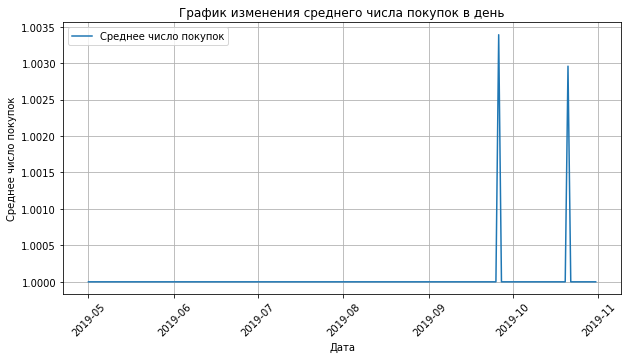

In [58]:
report.plot(y='orders_per_buyer', # столбец значений для вертикальной оси
           figsize=(10, 5), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Среднее число покупок', # название линии                       
           legend=True) # выводить ли легенду к графику

plt.title('График изменения среднего числа покупок в день')
plt.xlabel('Дата')
plt.ylabel('Среднее число покупок')
plt.show()

График подтверждает наши выводы: стабильность в 1 покупку и два пика: конец сентября 2019 года и конец октября (вероятно проводились пекламные  акции в эти даты). 

В среднем в день на одного пользователя приходится 1 покупка.

Посмотрим на среднее число покупок в неделю:

In [59]:
report2 = orders.copy()
report2['dt'] = report2['event_dt'].dt.date 
report2['week'] = report2['dt'].astype('datetime64[W]')
report2 = report2.groupby('week').agg({'user_id': 'nunique', 'event_dt': 'count'})
report2.columns = ['buyers', 'orders']
report2['orders_per_buyer'] = report2['orders'] / report2['buyers']
report2

,buyers,orders,orders_per_buyer
week,,,
2019-04-25,25,25,1.000000
2019-05-02,268,404,1.507463
2019-05-09,395,620,1.569620
2019-05-16,523,767,1.466539
2019-05-23,617,875,1.418152
2019-05-30,701,1011,1.442225
2019-06-06,743,1013,1.363392
2019-06-13,808,1095,1.355198
2019-06-20,925,1230,1.329730


In [60]:
report2.describe()

,buyers,orders,orders_per_buyer
count,28.000000,28.000000,28.000000
mean,1094.892857,1436.142857,1.316172
std,507.924560,634.019203,0.118059
min,25.000000,25.000000,1.000000
25%,732.500000,1012.500000,1.282209
50%,1128.500000,1522.500000,1.306324
75%,1455.500000,1879.000000,1.359679
max,1836.000000,2307.000000,1.569620


В среднем на покупателя приходится 1.3 покупки в неделю.

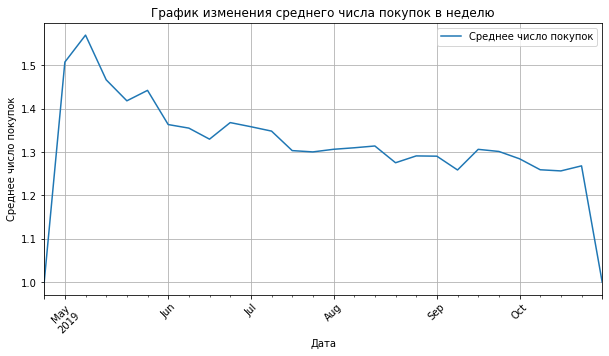

In [61]:
report2.plot(y='orders_per_buyer', # столбец значений для вертикальной оси
           figsize=(10, 5), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Среднее число покупок', # название линии                       
           legend=True) # выводить ли легенду к графику

plt.title('График изменения среднего числа покупок в неделю')
plt.xlabel('Дата')
plt.ylabel('Среднее число покупок')
plt.show()

Наглядно видно плавное снижение среднего числа заказов в неделю с пика в почти 1.6 

в мае 2019 года до 1.3 в октябре 2019 года. 

Вот и возникает вопрос, почему число заказов падает.

Посмотрим на среднее число покупок в месяц:

In [62]:
report3 = orders.copy()
report3['dt'] = report3['event_dt'].dt.date 
report3['month'] = report3['dt'].astype('datetime64[M]')
report3 = report3.groupby('month').agg({'user_id': 'nunique', 'event_dt': 'count'})
report3.columns = ['buyers', 'orders']
report3['orders_per_buyer'] = report3['orders'] / report3['buyers']
report3

,buyers,orders,orders_per_buyer
month,,,
2019-05-01,1226,2962,2.415987
2019-06-01,2130,4875,2.288732
2019-07-01,2801,6556,2.340593
2019-08-01,3476,7582,2.181243
2019-09-01,4124,8430,2.044132
2019-10-01,4670,9807,2.100000


In [63]:
report3.describe()

,buyers,orders,orders_per_buyer
count,6.000000,6.000000,6.000000
mean,3071.166667,6702.000000,2.228448
std,1280.003190,2479.848947,0.144278
min,1226.000000,2962.000000,2.044132
25%,2297.750000,5295.250000,2.120311
50%,3138.500000,7069.000000,2.234988
75%,3962.000000,8218.000000,2.327628
max,4670.000000,9807.000000,2.415987


В среднем на покупателя приходится 2.2 покупки в месяц.

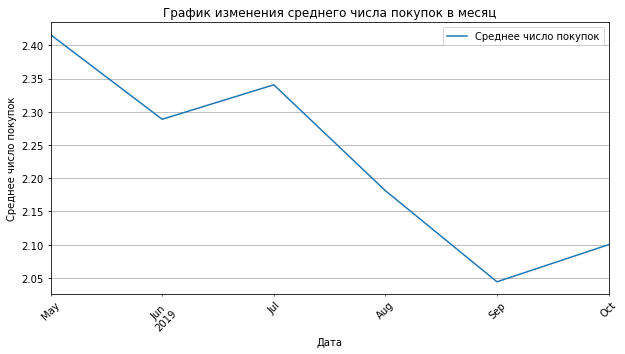

In [64]:
report3.plot(y='orders_per_buyer', # столбец значений для вертикальной оси
           figsize=(10, 5), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Среднее число покупок', # название линии                       
           legend=True) # выводить ли легенду к графику

plt.title('График изменения среднего числа покупок в месяц')
plt.xlabel('Дата')
plt.ylabel('Среднее число покупок')
plt.show()

Наблюдается  спад среднего числа покупок во времени - с 2.4 в мае 2019 года до 2 в сентябре (минимум). 

К октябрю число заказов стало немного расти и достигло 2.1.

#### Рассчитаем средний чек за день, неделю и месяц.

Применим группировку по дню/неделе/месяцу и рассчитаем выручку, деленную на количество заказов. 

In [65]:
daily_revenue_report = orders.copy()
daily_revenue_report['dt'] = daily_revenue_report['event_dt'].dt.date
daily_revenue_report = daily_revenue_report.groupby('dt').agg({'revenue': 'sum', 'event_dt': 'count'})
daily_revenue_report.columns = ['daily_revenue', 'orders']
daily_revenue_report['revenue_per_order'] = daily_revenue_report['daily_revenue'] / daily_revenue_report['orders']
daily_revenue_report

,daily_revenue,orders,revenue_per_order
dt,,,
2019-05-01,125.75,25,5.030000
2019-05-02,144.71,29,4.990000
2019-05-03,221.56,44,5.035455
2019-05-04,327.44,56,5.847143
2019-05-05,337.42,58,5.817586
...,...,...,...
2019-10-27,1722.60,340,5.066471
2019-10-28,1486.13,287,5.178153
2019-10-29,1642.85,315,5.215397


In [66]:
daily_revenue_report.describe()

,daily_revenue,orders,revenue_per_order
count,184.000000,184.000000,184.000000
mean,1173.711304,218.543478,5.375884
std,414.056103,77.657003,0.246025
min,125.750000,25.000000,4.990000
25%,857.220000,157.750000,5.185476
50%,1211.775000,227.500000,5.335974
75%,1465.622500,270.500000,5.544885
max,1894.360000,364.000000,6.204286


Средняя сумма заказов за день - 1211.7 (медиана), 1173.7 (среднее). 

Средний чек - 5.33 $

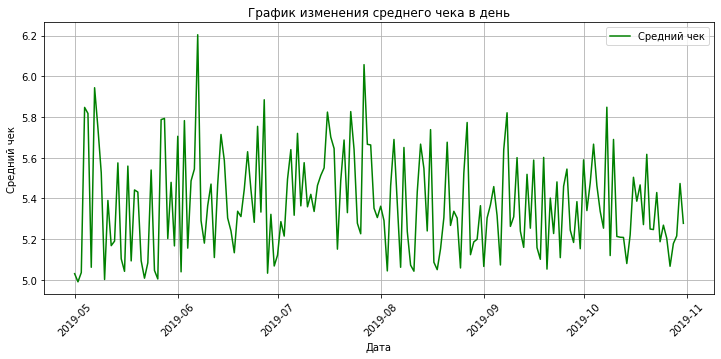

In [67]:
daily_revenue_report.plot(y='revenue_per_order', # столбец значений для вертикальной оси
           figsize=(12, 5), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Средний чек', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='ocean') 

plt.title('График изменения среднего чека в день')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Кривая графика визуализирует данные : размер среднего чека в день варьируется в пределах 5-6 $, медианное значение - 5.33.

Рассчитаем средний чек за неделю.

In [68]:
weekly_revenue_report = orders.copy()
weekly_revenue_report['dt'] = weekly_revenue_report['event_dt'].dt.date 
weekly_revenue_report['week'] = weekly_revenue_report['dt'].astype('datetime64[W]')
weekly_revenue_report = weekly_revenue_report.groupby('week').agg({'revenue': 'sum', 'event_dt': 'count'})
weekly_revenue_report.columns = ['weekly_revenue', 'orders']
weekly_revenue_report['revenue_per_order'] = weekly_revenue_report['weekly_revenue'] / weekly_revenue_report['orders']
weekly_revenue_report

,weekly_revenue,orders,revenue_per_order
week,,,
2019-04-25,125.75,25,5.030000
2019-05-02,2242.96,404,5.551881
2019-05-09,3266.80,620,5.269032
2019-05-16,4020.33,767,5.241630
2019-05-23,4689.25,875,5.359143
2019-05-30,5461.89,1011,5.402463
2019-06-06,5532.87,1013,5.461866
2019-06-13,5907.05,1095,5.394566
2019-06-20,6716.70,1230,5.460732


In [69]:
weekly_revenue_report.describe()

,weekly_revenue,orders,revenue_per_order
count,28.000000,28.000000,28.000000
mean,7712.960000,1436.142857,5.363435
std,3382.587997,634.019203,0.116345
min,125.750000,25.000000,5.030000
25%,5515.125000,1012.500000,5.283347
50%,8292.720000,1522.500000,5.351724
75%,9984.210000,1879.000000,5.454608
max,12407.930000,2307.000000,5.551881


Средняя сумма заказов за неделю - 8292 (медиана), 7713 (среднее), средний чек - 5.35

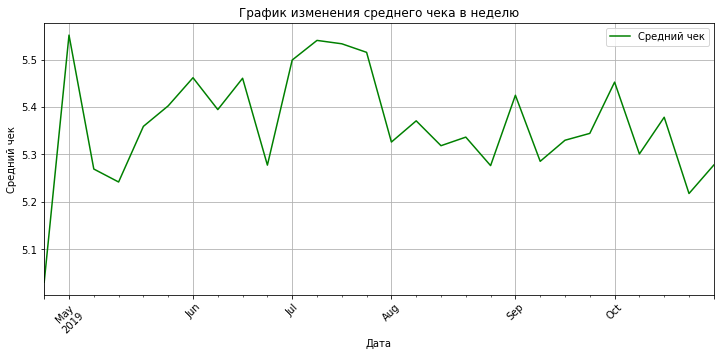

In [70]:
weekly_revenue_report.plot(y='revenue_per_order', # столбец значений для вертикальной оси
           figsize=(12, 5), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Средний чек', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='ocean') 

plt.title('График изменения среднего чека в неделю')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Средний чек в неделю варьируется в пределах 5.2 - 5.55 в течение всего рассматриваемого периода. Максимальные значения (5.55) среднего недельного чека наблюдаются в мае и начале июля 2019 года.

Рассчитаем средний чек за месяц.

In [71]:
monthly_revenue_report = orders.copy()
monthly_revenue_report['dt'] = monthly_revenue_report['event_dt'].dt.date 
monthly_revenue_report['month'] = monthly_revenue_report['dt'].astype('datetime64[M]')
monthly_revenue_report = monthly_revenue_report.groupby('month').agg({'revenue': 'sum', 'event_dt': 'count'})
monthly_revenue_report.columns = ['monthly_revenue', 'orders']
monthly_revenue_report['revenue_per_order'] = monthly_revenue_report['monthly_revenue'] / monthly_revenue_report['orders']
monthly_revenue_report

,monthly_revenue,orders,revenue_per_order
month,,,
2019-05-01,15787.38,2962,5.329973
2019-06-01,26428.25,4875,5.421179
2019-07-01,35988.44,6556,5.489390
2019-08-01,40401.18,7582,5.328565
2019-09-01,44941.70,8430,5.331163
2019-10-01,52415.93,9807,5.344747


In [72]:
monthly_revenue_report.describe()

,monthly_revenue,orders,revenue_per_order
count,6.000000,6.000000,6.000000
mean,35993.813333,6702.000000,5.374169
std,13183.136587,2479.848947,0.066684
min,15787.380000,2962.000000,5.328565
25%,28818.297500,5295.250000,5.330270
50%,38194.810000,7069.000000,5.337955
75%,43806.570000,8218.000000,5.402071
max,52415.930000,9807.000000,5.489390


Средняя сумма заказов за месяц - 38195 (медиана), 35994 (среднее), средний чек - 5.33 

С большой долей вероятности можно предположить, что данные, предоставленные для анализа, это данные сервиса с подписками, где оплата происходит раз в месяц.

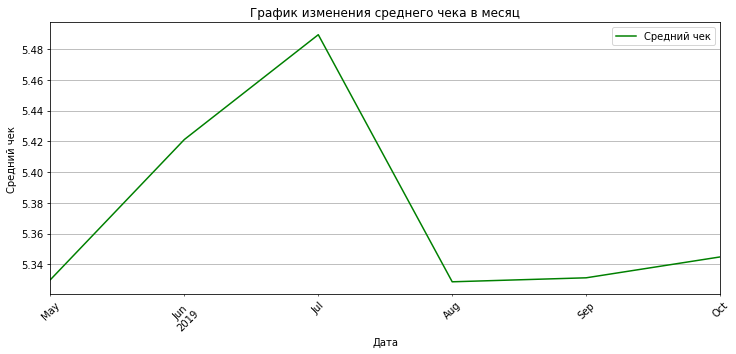

In [73]:
monthly_revenue_report.plot(y='revenue_per_order', # столбец значений для вертикальной оси
           figsize=(12, 5), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Средний чек', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='ocean') 

plt.title('График изменения среднего чека в месяц')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()


В июле 2019 года среднемесячный чек был на самом высоком значении - 5.49, после чего упал к августу до 5.3. 

Возможно, это связано с периодом отпусков.

Начиная с августа, и  до октября средний чек вновь начал постепенно расти.

#### Посчитаем общую сумму расходов на маркетинг.

In [74]:
# данные возьмем из столбца затраты (costs) датасета costs 
display(costs['costs'].sum())

105497.30000000002

Итак, расходы на маркетинг составили суммарно 105 497 $

In [75]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


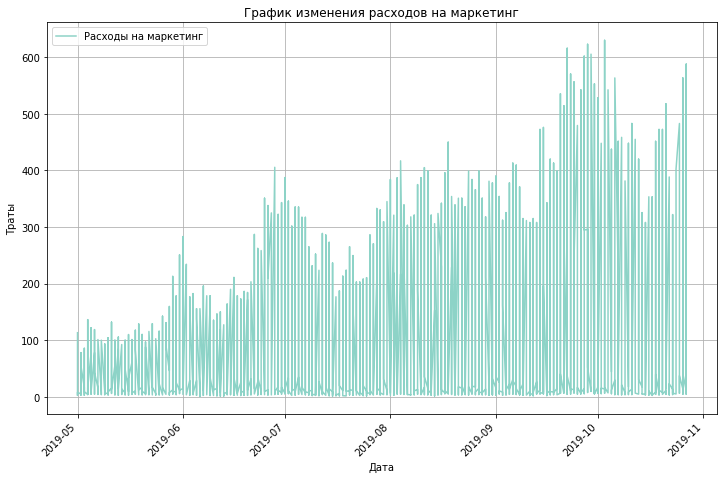

In [76]:
costs.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='Set3') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Видим уведичение расходов на маркетинг с течением времени. 

В конце сентября - начале октября они достигли исторического пика в 630 $, 

затем стали  снижаться до 400 и к концу октября внось устремились к 600.

Выясним, как затраты распределены по источникам.

In [77]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Наибольшие расходы на рекламу идут  на источник TipTop (51.9%). 

Затем следует источник FaceBoom(30.75%). 

Далее идут низкозатратные источники WahooNetBanner (4.88%), 

AdNonSense (3.71%), OppleCreativeMedia (2.04%). 

На оставшиеся источники приходится 1-2% трат.

Визуализируем изменения метрик во времени.

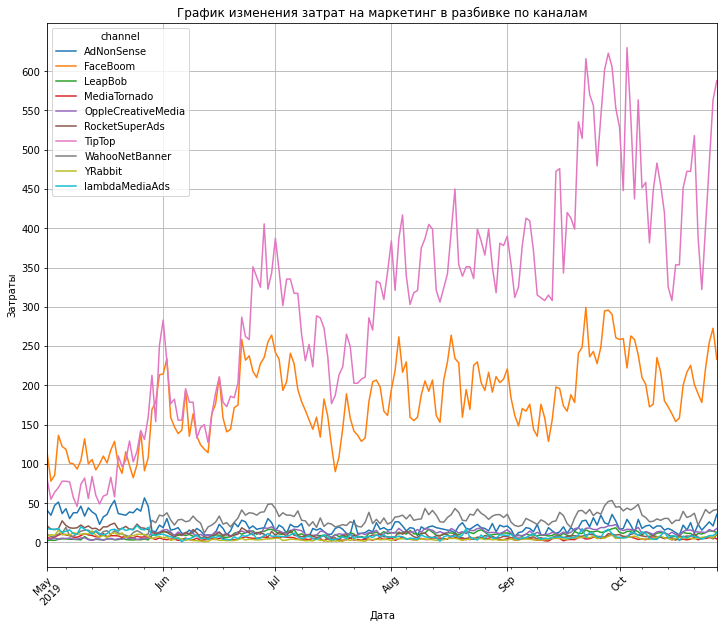

In [78]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           #colormap='ocean'
) 

plt.yticks(np.arange(0, 650, 50)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Выделяются лидеры - это TipTop и FaceBoom. 

Больше всего трафика закупали у TipTop и к октябрю число трат приближалось к 650 $

Расходы  на FaceBoom составляют примерно 300. 

В то время как, остальные источники не показывают какую-либо значительную динамику, 

то затраты на источник Tip-Top возрастают со временем. 

Остальные каналы привлечения обходятся не  дорого. 

Укрупним график, чтобы понять динамику остальных источников.

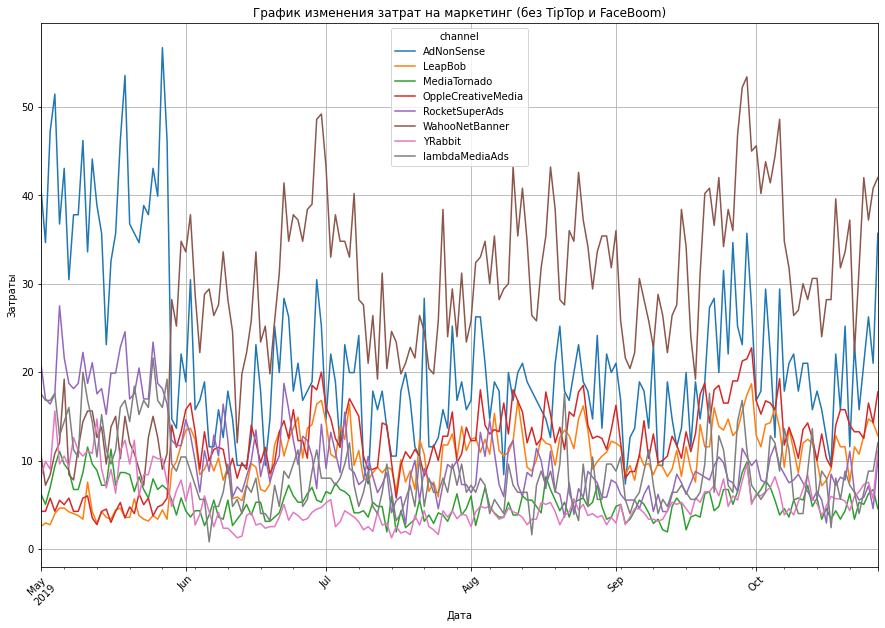

In [79]:
filtered_data2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filtered_data2.plot(                                             
           figsize=(15, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           #colormap='ocean'
) 

plt.yticks(np.arange(0,  60, 10)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти затраты на WahooNetBanner (к октябрю их число было в районе 53 $).

Затраты на AdNonSense, напротив, стали снижаться с июня 2019 года (с 55 до 35). 

По остальным источникам затраты варьируются в пределах 3-20 $

#### Рассчитаем, сколько в среднем стоило привлечение одного пользователя из каждого источника.

Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Будем использовать профили пользователей.
Информация о стоимости привлечения есть у нас в колонке 'acquisition_cost'.

In [80]:
profiles.describe()

,user_id,acquisition_cost
count,1.500080e+05,150008.000000
mean,4.993238e+11,0.703278
std,2.889483e+11,0.954097
min,5.993260e+05,0.000000
25%,2.489249e+11,0.000000
50%,4.977046e+11,0.247500
75%,7.494919e+11,1.108943
max,9.999996e+11,3.715385


Исключим из источников бесплатно привлеченных пользователей:

In [81]:
profiles = profiles.query('channel != "organic"')

Медианная стоимость привлечения одного пользователя - 0.24. 

При этом среднее находится на значении 0.7. 

Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медиане. 

Максимальная стоимость привлечения пользователя - 3.71 у.е.

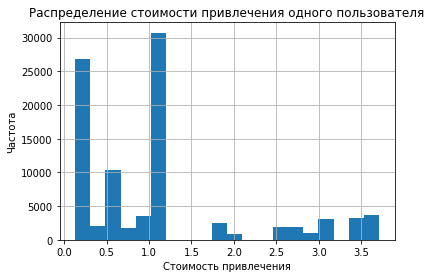

In [82]:
profiles['acquisition_cost'].hist(bins=20)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

Видим, что максимальное распределение приходится на  диапазон 0,3 - 1,3

In [83]:
#Посмотрим на CAC для каждого источника трафика.

cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), 

далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01, соответственно). 

Остальные каналы берут за пользователя от 0.21 до 0.72.

###  Вывод 

В результате исследования, для оценки размера аудитории были использованы метрики DAU, MAU, WAU. 

Они помогают выявить сопутствующие прогнозы и выводы, а также оценить лояльность и вовлеченность аудитории (Sticky Factor)

Среднее значение DAU - 1684.2 пользователя, медиана практически на том же уровне - 1682.

Среднее значение WAU - 7942.2 пользователя, медиана расположена довольно близко к среднему - 8216. 

Виден плавный рост недельной аудитории, в последнюю неделю сентября ее число приблизилось к 12000, после чего в октябре стало падать до 10000 пользователей.

Среднее значение MAU - 28989 пользователей, медиана - 29087 пользователей. 

Виден рост аудитории начина с июня (было ~ 26000 пользователей) и до сентября (почти 32000 пользователей в месяц), что не может не рабовать менеджеров сервиса) 

К октябрю MAU стал немного падать (кривая стремится к 31000).

Посчитано среднее число покупок на покупателя. В среднем на покупателя приходится 1 покупка в день. Изучен график изменения числа покупок в день. На нем заметна стабильность и два пика: в конце сентября 2019 года и в конце октября (вероятно, период агрессивных рекламных кампаний). В среднем в день на одного пользователя приходится 1 покупка.

Изучено среднее число покупок в неделю. В среднем на покупателя приходится 1.3 покупки в неделю. Видно плавное снижение среднего числа заказов в неделю с пика в почти 1.6 в мае 2019 года до 1.3 в октябре 2019 года. Надо разбираться, почему число заказов падает.

Таким образом, можем дать ответы на поставленные вопросы:

##### Сколько денег потратили? Всего / на каждый источник / по времени
Всего потрачено  на маркетинг  105 497 $.

Наибольшие расходы на рекламу идут на источник TipTop (51.9%).

Затем следует источник FaceBoom(30.75%).

Далее идут низкозатратные источники WahooNetBanner (4.88%),

AdNonSense (3.71%), OppleCreativeMedia (2.04%).

На оставшиеся источники приходится 1-2% затрат.

С мая по июль больше всего трафика закупали у TipTop и к октябрю число трат приближалось к 650 $

Расходы на FaceBoom в тот же период составляют примерно 300.

В то время как, остальные источники не показывают какую-либо значительную динамику,

то затраты на источник Tip-Top возрастают со временем.

##### Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя),

далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01, соответственно).

Остальные каналы берут за пользователя от 0.21 до 0.72.


# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Для начала рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

In [84]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

NameError: name 'timedelta' is not defined

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

### Проанализируйте окупаемость рекламы с разбивкой по странам

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.